In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import stac
from rasterio.windows import Window

In [1]:
from eocube import DataCube, config
config.ACCESS_TOKEN = "a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV"

In [2]:
eocube_service = DataCube()

In [4]:
eocube_service.getRandomNumbers(15)

[13, 14, 10, 12, 2, 4, 8, 9, 13, 2, 6, 3, 1, 15, 15]

In [6]:
eocube_service.getCollections()

['S2_MSI_L2_SR_LASRC-1',
 'S2_MSI_L2_SR_6SV1-1',
 'LC8SR-1',
 'MOD13Q1-6',
 'S2_10_16D_STK-1',
 'S2-SEN2COR_10_16D_STK-1',
 'S2_10-1',
 'CB4MUX_20-1',
 'CB4MUX_20_1M_STK-1',
 'LC8_30-1',
 'LC8_30_16D_STK-1',
 'CB4_20_1M_STK-1',
 'CB4_64_16D_STK-1',
 'CB4_64-1',
 'CB4-MUX-L4-SR-CMPAC-COG-1',
 'CB4A-MOSAIC-PARAIBA_55_3M_STK-1',
 'S2-MOSAIC-PARAIBA_10_3M_STK-1',
 'CB4-MOSAIC-BRAZIL_64_3M_STK-1',
 'KD_S2_20M_VISBANDS_CURUAI-1',
 'LCC_S2_10_1M_STK_PA-SPC-AC-NA-1',
 'LCC_C4_64_1M_STK_PA-SPC-AC-NA-1',
 'LCC_L8_30_1M_STK_PA-SPC-AC-NA-1',
 'LCC_C4_64_1M_STK_GO_PA-SPC-AC-NA-1',
 'LCC_C4_64_1M_STK_MT_PA-SPC-AC-NA-1',
 'LCC_C4_64_1M_STK_MT_RF_PA-SPC-AC-NA-1']

In [8]:
bbox = (-46.01348876953125, -23.08478515994374, -45.703125, -23.34856015148709)

In [33]:
items = service.search({
    'collections': ['CB4_64_16D_STK-1'],
    'bbox': bbox,
    'datetime': '2018-08-01/2019-07-31',
    'limit': 30
})

In [66]:
item = items.features[0]

In [67]:
red = item.read('BAND15', bbox=bbox)
red

array([[424, 428, 479, ..., 616, 642, 632],
       [503, 557, 749, ..., 637, 693, 732],
       [349, 356, 541, ..., 872, 876, 895],
       ...,
       [495, 588, 663, ..., 491, 517, 698],
       [511, 568, 574, ..., 506, 417, 588],
       [441, 579, 627, ..., 570, 525, 626]], dtype=int16)

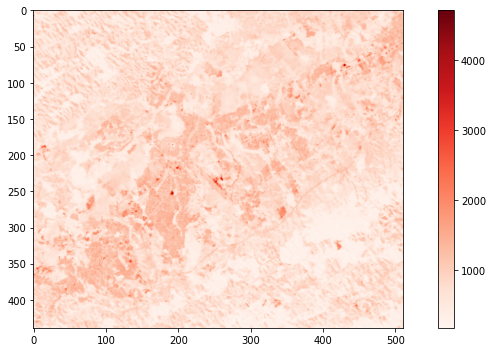

In [68]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Reds', 1000)
plt.imshow(red, cmap=colormap)
plt.tight_layout()
plt.colorbar()

plt.show()

In [43]:
nir = item.read('BAND16', bbox=bbox)
nir

array([[ 972, 1737, 2391, ..., 3582, 3575, 2901],
       [1350, 1941, 2494, ..., 3416, 3269, 3073],
       [1024, 1146, 1554, ..., 3029, 2791, 3124],
       ...,
       [2746, 2287, 2373, ..., 2160, 1827, 1815],
       [2544, 2232, 2235, ..., 1938, 1716, 1705],
       [2601, 2496, 2342, ..., 2482, 2017, 2056]], dtype=int16)

In [7]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('infrared', 1000)
plt.imshow(nir, cmap=colormap)
plt.tight_layout()
plt.colorbar()

plt.show()

NameError: name 'plt' is not defined

In [48]:
ndvi = (nir - red)/(nir + red)
ndvi

array([[0.39255014, 0.60461894, 0.66620209, ..., 0.70652692, 0.69551814,
        0.6422304 ],
       [0.4570966 , 0.55404323, 0.53808202, ..., 0.68566494, 0.65017668,
        0.6152431 ],
       [0.49162418, 0.52596538, 0.48353222, ..., 0.55293514, 0.52222525,
        0.55461558],
       ...,
       [0.69453872, 0.59095652, 0.56324111, ..., 0.62957375, 0.55887372,
        0.44448866],
       [0.66546645, 0.59428571, 0.59131363, ..., 0.58592471, 0.60900141,
        0.48713476],
       [0.71005917, 0.62341463, 0.57763557, ..., 0.62647444, 0.58693942,
        0.53318419]])

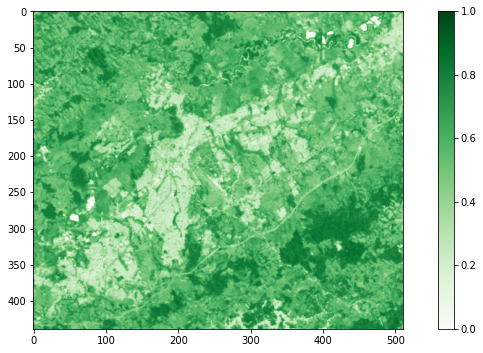

In [65]:
plt.figure(figsize=(10, 5))
norm = mpl.colors.Normalize(vmin=0, vmax=1)
colormap = plt.get_cmap('Greens', 1000)
plt.imshow(ndvi, norm=norm, cmap=colormap)
plt.tight_layout()
plt.colorbar()

plt.show()

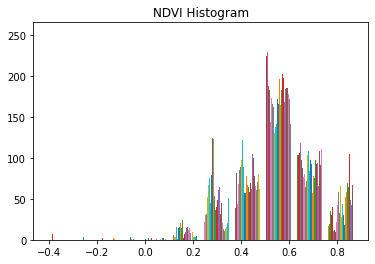

In [56]:
plt.title("NDVI Histogram")
plt.hist(ndvi)
plt.show()

In [70]:
red = item.read('BAND15', window=Window(0, 0, 500, 500)) # Window(col_off, row_off, width, height)
green = item.read('BAND14', window=Window(0, 0, 500, 500))
blue = item.read('BAND13', window=Window(0, 0, 500, 500))

In [71]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

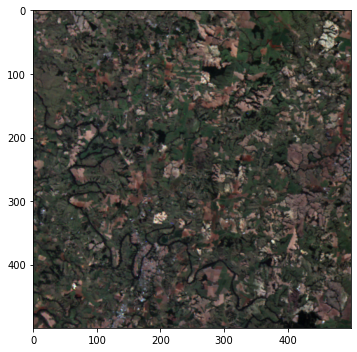

In [72]:
rgb = np.dstack((normalize(red), normalize(green), normalize(blue)))
plt.figure(figsize=(10, 5))
plt.imshow(rgb)
plt.tight_layout()

plt.show()